In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

608

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 75.87,
  'feels_like': 77.38,
  'temp_min': 72.21,
  'temp_max': 77.79,
  'pressure': 1008,
  'humidity': 90},
 'visibility': 10000,
 'wind': {'speed': 14.97, 'deg': 190},
 'clouds': {'all': 100},
 'dt': 1658190561,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1658136190,
  'sunset': 1658189842},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 10

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 10 | hithadhoo
Processing Record 2 of Set 10 | acapulco
Processing Record 3 of Set 10 | rikitea
Processing Record 4 of Set 10 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 10 | nouadhibou
Processing Record 6 of Set 10 | lokosovo
Processing Record 7 of Set 10 | kahului
Processing Record 8 of Set 10 | okhotsk
Processing Record 9 of Set 10 | marcona
City not found. Skipping...
Processing Record 10 of Set 10 | bengkulu
Processing Record 11 of Set 10 | dikson
Processing Record 12 of Set 10 | baiyin
Processing Record 13 of Set 10 | busselton
Processing Record 14 of Set 10 | hamilton
Processing Record 15 of Set 10 | ushuaia
Processing Record 16 of Set 10 | siocon
Processing Record 17 of Set 10 | tautira
Processing Record 18 of Set 10 | port alfred
Processing Record 19 of Set 10 | kungurtug
Processing Record 20 of Set 10 | hobart
Processing Record 21 of Set 10 | satinka
Processing Reco

Processing Record 38 of Set 13 | jamestown
Processing Record 39 of Set 13 | sao filipe
Processing Record 40 of Set 13 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 13 | guasdualito
Processing Record 42 of Set 13 | alta floresta
Processing Record 43 of Set 13 | adrar
Processing Record 44 of Set 13 | pensacola
Processing Record 45 of Set 13 | ifakara
Processing Record 46 of Set 13 | ribeira brava
Processing Record 47 of Set 13 | kargasok
Processing Record 48 of Set 13 | mount isa
Processing Record 49 of Set 13 | ancud
Processing Record 50 of Set 13 | inta
Processing Record 1 of Set 14 | avarua
Processing Record 2 of Set 14 | portland
Processing Record 3 of Set 14 | villa bruzual
Processing Record 4 of Set 14 | saskylakh
Processing Record 5 of Set 14 | kaeo
Processing Record 6 of Set 14 | norman wells
Processing Record 7 of Set 14 | samusu
City not found. Skipping...
Processing Record 8 of Set 14 | airai
Processing Record 9 of Set 14 | kodiak
Processing Record 10 

Processing Record 19 of Set 17 | vacaria
Processing Record 20 of Set 17 | auki
Processing Record 21 of Set 17 | imbituba
Processing Record 22 of Set 17 | princeton
Processing Record 23 of Set 17 | floro
Processing Record 24 of Set 17 | hunza
City not found. Skipping...
Processing Record 25 of Set 17 | knysna
Processing Record 26 of Set 17 | fort nelson
Processing Record 27 of Set 17 | havoysund
Processing Record 28 of Set 17 | borovoy
Processing Record 29 of Set 17 | port-gentil
Processing Record 30 of Set 17 | sharjah
Processing Record 31 of Set 17 | kamenka
Processing Record 32 of Set 17 | paita
Processing Record 33 of Set 17 | petropavlovsk-kamchatskiy
Processing Record 34 of Set 17 | saint anthony
Processing Record 35 of Set 17 | doha
Processing Record 36 of Set 17 | eyl
Processing Record 37 of Set 17 | bubaque
Processing Record 38 of Set 17 | klaksvik
Processing Record 39 of Set 17 | goundam
Processing Record 40 of Set 17 | ixtapa
Processing Record 41 of Set 17 | ocampo
Processing

Processing Record 8 of Set 21 | ozgon
City not found. Skipping...
Processing Record 9 of Set 21 | tessalit
Processing Record 10 of Set 21 | jucurutu
Processing Record 11 of Set 21 | isilkul
Processing Record 12 of Set 21 | gat
Processing Record 13 of Set 21 | banda aceh
Processing Record 14 of Set 21 | ihosy
Processing Record 15 of Set 21 | manavgat
Processing Record 16 of Set 21 | te anau
Processing Record 17 of Set 21 | zlatoustovsk
City not found. Skipping...
Processing Record 18 of Set 21 | san cristobal
Processing Record 19 of Set 21 | sesheke
Processing Record 20 of Set 21 | fiche
Processing Record 21 of Set 21 | boca do acre
Processing Record 22 of Set 21 | vardo
Processing Record 23 of Set 21 | funadhoo
Processing Record 24 of Set 21 | punta de piedra
Processing Record 25 of Set 21 | azul
Processing Record 26 of Set 21 | zhangjiakou
Processing Record 27 of Set 21 | vagur
Processing Record 28 of Set 21 | camapua
Processing Record 29 of Set 21 | olinda
Processing Record 30 of Set

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,82.63,74,97,12.80,MV,2022-07-19 00:38:44
1,Acapulco,16.8634,-99.8901,85.82,74,40,11.50,MX,2022-07-19 00:38:44
2,Rikitea,-23.1203,-134.9692,74.68,74,0,10.67,PF,2022-07-19 00:38:44
3,Nouadhibou,20.9310,-17.0347,73.38,78,77,9.22,MR,2022-07-19 00:38:45
4,Lokosovo,61.1333,74.8167,61.00,69,95,7.16,RU,2022-07-19 00:38:45
5,Kahului,20.8947,-156.4700,87.82,61,40,26.46,US,2022-07-19 00:38:45
6,Okhotsk,59.3833,143.3000,62.60,78,87,6.73,RU,2022-07-19 00:38:46
7,Bengkulu,-3.8004,102.2655,78.57,79,13,3.09,ID,2022-07-19 00:38:46
8,Dikson,73.5069,80.5464,46.18,77,10,12.12,RU,2022-07-19 00:38:46
9,Baiyin,36.5583,104.2081,60.82,75,98,3.20,CN,2022-07-19 00:38:47


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time


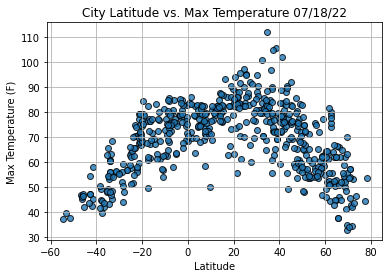

In [17]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

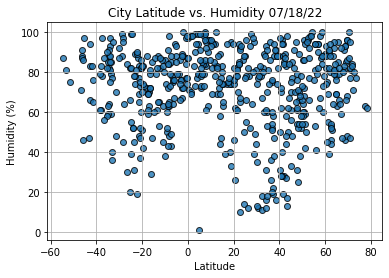

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

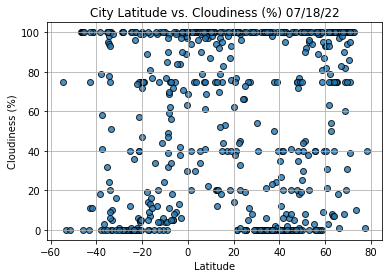

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

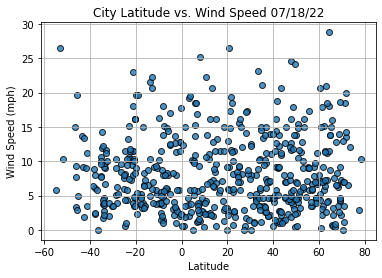

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                       Siocon
Lat                        7.7061
Lng                      122.1353
Max Temp                    79.57
Humidity                       83
Cloudiness                    100
Wind Speed                   3.78
Country                        PH
Date          2022-07-19 00:38:48
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1       True
2      False
3       True
4       True
       ...  
554    False
555    False
556     True
557     True
558     True
Name: Lat, Length: 559, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,Acapulco,16.8634,-99.8901,85.82,74,40,11.50,MX,2022-07-19 00:38:44
3,Nouadhibou,20.9310,-17.0347,73.38,78,77,9.22,MR,2022-07-19 00:38:45
4,Lokosovo,61.1333,74.8167,61.00,69,95,7.16,RU,2022-07-19 00:38:45
5,Kahului,20.8947,-156.4700,87.82,61,40,26.46,US,2022-07-19 00:38:45
6,Okhotsk,59.3833,143.3000,62.60,78,87,6.73,RU,2022-07-19 00:38:46


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

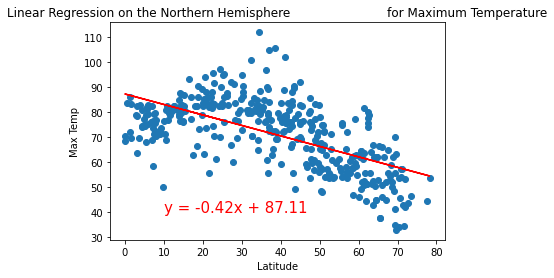

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

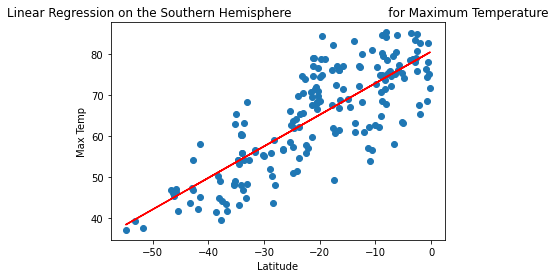

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

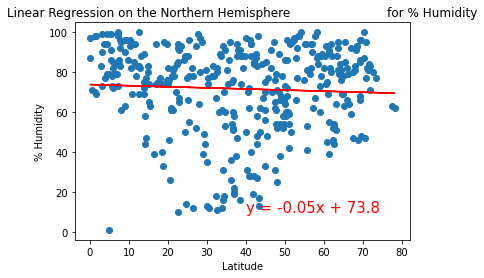

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))